## Supporter Vector Machines

### 1. Definition
### 2. Methods of analyzing
### 3. Use in Python
### 4. Practice

### 1.Definition


##### 1-1 What is SVM? 

Supporter Vector Machines(SVM)은 n차원에 찍혀있는 점들을 구분하는 hyperplane을 정의하는 방식이다.
여기서 hyperplane이란 'a subspace of one dimension less than its ambient space'로서 n차원의 공간에 데이터가 찍혀있으면 n-1차원의 subspace가 되는 것이다. 
즉, 3차원의 공간에서 hyperplane은 2차원 평면이고, 2차원의 공간에서 hyperplane은 1차원의 직선이다.

또한, hyperplane에 의해서 나눠진 데이터들은 hyperplane을 서로 비슷한 특징을 가지고 있다.
즉, SVM 알고리즘은 두 개의 class로 데이터를 나누는 line을 찾는 알고리즘인 것이다.

##### 1-2 How to get a hyperplane?

사실 데이터를 두 개의 class로 나눌 수 있는 hyperplane은 수백 수만개이다. 하지만 우리는 그 중에서 데이터를 '가장' 잘 나누는 hyperplane을 사용할 것이고 그것이 바로 Maximum Margin Hyperplane(MMH)이다.
어떻게 MMH를 구하는지는 다음 장에서 보도록하자.

다음은 MMH에 대한 그림이다.

MMH로 인해 데이터가 두 개의 class로 나뉘게 되었다. 이랬을 때, 왼쪽 class에서 hyperplane에 가장 가까운 점, 오른쪽 class에서 hyperplane에 가장 가까운 점, 이 두 점을 support vectors라고 부른다. 


![google](https://upload.wikimedia.org/wikipedia/commons/2/2a/Svm_max_sep_hyperplane_with_margin.png)


### 2. Methods of analyzing


##### 2-1. Linearly separable data

MMH를 구하는 가장 쉬운 방법은 데이터가 선형적으로 나눠진다고 가정하는 것이다. 선형적으로 나눠질 경우에는 MMH를 구하는 방법이 두 가지 있다.

(1) Quadratic Optimization

두 class의 convex hull을 각각 구한다. 여기서 convex hull이란 hyperplane에 의해서 나뉘어진 각 class의 가장 가장자리에 위치한 데이터를 연결한 boundary이다. 이 때,MMH는 두 개의 convex hull의 수직 이등분선이다.

![google](http://www.bic.mni.mcgill.ca/users/lau/comp644/Images/convex_hull_drawn.jpg)

(2) 데이터를 두 개의 homogeneous한 그룹으로 나눠주는 한 쌍의 평행한 plane들 중에서 가장 거리가 먼 쌍이 MMH이다.
이 방법은 벡터에 관한 수식을 이용하여 Euclidean norm을 이용하여 직접 계산을 하는 방식이므로 여기서는 생략하도록 한다.
방식은 (1)은 Quadratic Optimization과 비슷하다.

*간단히 설명을 하자면 다음 식을 최소화시켜주는 값이 MMH이다.

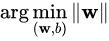



##### 2-2. Non-linearly separable data

하지만 모든 데이터가 선형적으로 나눠진다고 볼 수는 없다. 이럴 때는 다음 두 가지 방법을 이용한다

(1) Using with slack variable

slack variable이란 데이터가 잘못 분류가 되었을 때 (즉, A 클래스로 가야되는 점이 MMH로 인해 B클래스로 구분이 된 경우) MMH로부터의 거리를 뜻한다. 즉, slack variable = 0 이면 데이터가 잘 분류가 되었다는 것을 의미한다.

2-1 (2)에서 구한 식을 다음과 같이 정정한다.

argmin (||w|| + C * sum of slack variables)

여기서 C는 cost로써 데이터를 잘못 분류함으로서 주어지는 비용이다. 즉, hyperplane이 잘못 데이터를 분류함으로서 주어지는 패널티인 것이다.


 
(2) Using kernels for non-linear spaces

kernel trick을 이용하면 non-linear한 관계도 linear하게 보일 수 있다. 즉, 데이터를 좀 더 고차원적으로 보는 것이다.

다음 사진을 보자

![google](https://cdn-images-1.medium.com/max/1600/0*ngkO1BblQXnOTcmr.png)


왼쪽 그림을 보면 두 개의 데이터는 원 모양의 형태를 띠고 있다. 어떠한 선을 긋는다고 하더라도 데이터를 선형적으로 구분하는 것이 다소 힘들어보인다. 반면에 왼쪽 그림을 3차원으로 바라보게 되면 z축에 평형한 평면으로 데이터를 두 개의 클래스로 나눌 수 있다는 것을 알 수 있다.

예를 들면, x=경도, y=위도, z=고도, red = snowy, blue = sunny 라고 가정한다면 snowy랑 sunny는 고도로 인해 두 개의 클래스로 나뉘게 된다.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
colnames = ['sepal-length','sepal-width','petal-length','petal-width','class']
iris = pd.read_csv(url, names=colnames)

In [11]:
iris.shape
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
x = np.asarray(iris.drop('class',axis=1))
y = iris['class']

In [17]:
for i in range(len(y)) : 
    if y[i] == 'Iris-setosa' : 
        y[i] = 0
    elif y[i] == 'Iris-versicolor' : 
        y[i] = 1
    elif y[i] == 'Iris-virginica' : 
        y[i] = 2

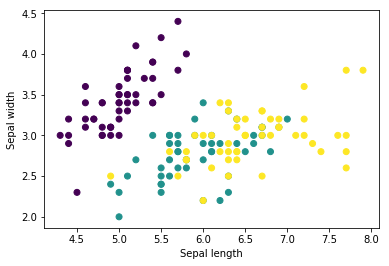

In [18]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

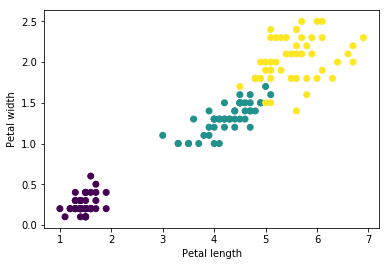

In [19]:
plt.scatter(x[:,2],x[:,3],c=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [21]:
#SVM with linear kernel with Sepal data
from sklearn import svm
svc = svm.SVC(kernel='linear',C=1.0)
x_train = x_train.astype(int)
y_train = y_train.astype(int)
svc.fit(x_train[:,:2],y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
y_pred = svc.predict(x_test[:,:2])

In [23]:
y_test = y_test.astype(int)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[13  0  0]
 [ 1  2 14]
 [ 0  0 15]]
             precision    recall  f1-score   support

          0       0.93      1.00      0.96        13
          1       1.00      0.12      0.21        17
          2       0.52      1.00      0.68        15

avg / total       0.82      0.67      0.58        45



Text(0,0.5,'Sepal width')

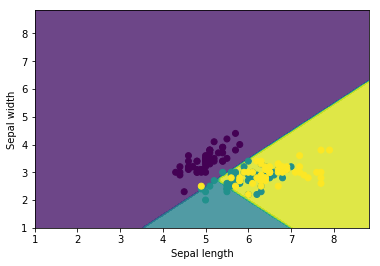

In [24]:
x_min, x_max = x[:,:2].min( ) -1, x[:,:2].max( ) + 1
y_min, y_max = x[:,:2].min( ) -1, x[:,:2].max( ) + 1
h = (x_max/x_min)/100
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min, y_max,h))

plt.subplot(1, 1, 1)
z = svc.predict(np.c_[xx.ravel( ), yy.ravel( )])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [25]:
#SVM with Gaussian kernel with Sepal data
from sklearn import svm
svc = svm.SVC(kernel='rbf',gamma=0.7) #gamma를 증가시키면 일반적으로 훈련 샘플의 영향력이 증가하고, 결정경계가 더 부드러워진다
x_train = x_train.astype(int)
y_train = y_train.astype(int)
svc.fit(x_train[:,:2],y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
y_pred = svc.predict(x_test[:,:2])

In [27]:
y_test = y_test.astype(int)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[13  0  0]
 [ 1  2 14]
 [ 0  0 15]]
             precision    recall  f1-score   support

          0       0.93      1.00      0.96        13
          1       1.00      0.12      0.21        17
          2       0.52      1.00      0.68        15

avg / total       0.82      0.67      0.58        45



Text(0,0.5,'Sepal width')

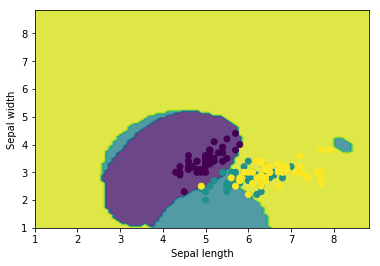

In [28]:
x_min, x_max = x[:,:2].min( ) -1, x[:,:2].max( ) + 1
y_min, y_max = x[:,:2].min( ) -1, x[:,:2].max( ) + 1
h = (x_max/x_min)/100
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min, y_max,h))

plt.subplot(1, 1, 1)
z = svc.predict(np.c_[xx.ravel( ), yy.ravel( )])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [29]:
#SVM with polynomial kernel with Sepal data
from sklearn import svm
svc = svm.SVC(kernel='poly',degree=3) #일반적으로 3을 사용
x_train = x_train.astype(int)
y_train = y_train.astype(int)
svc.fit(x_train[:,:2],y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
y_pred = svc.predict(x_test[:,:2])

In [31]:
y_test = y_test.astype(int)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[13  0  0]
 [ 1  2 14]
 [ 0  0 15]]
             precision    recall  f1-score   support

          0       0.93      1.00      0.96        13
          1       1.00      0.12      0.21        17
          2       0.52      1.00      0.68        15

avg / total       0.82      0.67      0.58        45



Text(0,0.5,'Sepal width')

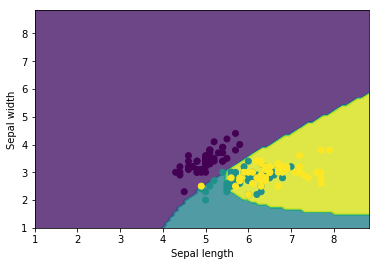

In [32]:
x_min, x_max = x[:,:2].min( ) -1, x[:,:2].max( ) + 1
y_min, y_max = x[:,:2].min( ) -1, x[:,:2].max( ) + 1
h = (x_max/x_min)/100
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min, y_max,h))

plt.subplot(1, 1, 1)
z = svc.predict(np.c_[xx.ravel( ), yy.ravel( )])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [33]:
#SVM with sigmoid kernel with Sepal data
from sklearn import svm
svc = svm.SVC(kernel='sigmoid')
x_train = x_train.astype(int)
y_train = y_train.astype(int)
svc.fit(x_train[:,:2],y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
y_pred = svc.predict(x_test[:,:2])

In [35]:
y_test = y_test.astype(int)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[13  0  0]
 [17  0  0]
 [15  0  0]]
             precision    recall  f1-score   support

          0       0.29      1.00      0.45        13
          1       0.00      0.00      0.00        17
          2       0.00      0.00      0.00        15

avg / total       0.08      0.29      0.13        45



/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0,0.5,'Sepal width')

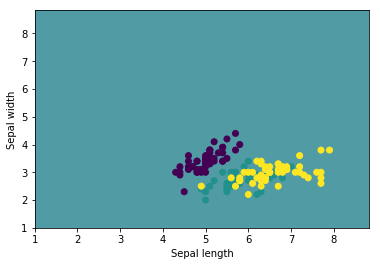

In [36]:
x_min, x_max = x[:,:2].min( ) -1, x[:,:2].max( ) + 1
y_min, y_max = x[:,:2].min( ) -1, x[:,:2].max( ) + 1
h = (x_max/x_min)/100
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min, y_max,h))

plt.subplot(1, 1, 1)
z = svc.predict(np.c_[xx.ravel( ), yy.ravel( )])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Sepal data의 경우, Gaussian method를 하였을 때 F-measure의 값이 가장 높았다

What is difference between Gaussian and Sigmoid?

Gaussian은 저차원을 고차원으로 바꾸어서 두 개의 클래스로 나누는 기법
![google](https://i.stack.imgur.com/7yM2K.png)

Sigmoid는 다음과 같은 식을 구하여 K(x,y)=tanh(α(x⋅y)+c) K(x,y)를 3차원 축으로 두어서 두 개의 클래스로 나누는 기법
![google](https://i.stack.imgur.com/dDEF4.png)

In [37]:
#SVM with linear kernel with Petal data
from sklearn import svm
svc = svm.SVC(kernel='linear',C=1.0)
x_train = x_train.astype(int)
y_train = y_train.astype(int)
svc.fit(x_train[:,2:],y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
y_pred = svc.predict(x_test[:,2:])

In [39]:
y_test = y_test.astype(int)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[13  0  0]
 [ 0  7 10]
 [ 0  0 15]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.41      0.58        17
          2       0.60      1.00      0.75        15

avg / total       0.87      0.78      0.76        45



ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

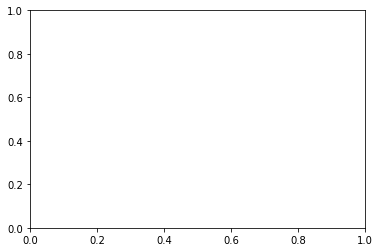

In [40]:
x_min, x_max = x[:,2:].min( ) -1, x[:,2:].max( ) + 1
y_min, y_max = x[:,2:].min( ) -1, x[:,2:].max( ) + 1
h = (x_max/x_min)/100
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min, y_max,h)) #위에서는 잘 작동하는게 왜 똑같은데에서 값이 부여가 안되죠..ㅠ

plt.subplot(1, 1, 1)
z = svc.predict(np.c_[xx.ravel( ), yy.ravel( )])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(x[:,2],x[:,3],c=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')

In [41]:
#SVM with Gaussian kernel with Sepal data
from sklearn import svm
svc = svm.SVC(kernel='rbf',gamma=0.7)
x_train = x_train.astype(int)
y_train = y_train.astype(int)
svc.fit(x_train[:,2:],y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
y_pred = svc.predict(x_test[:,2:])

In [43]:
y_test = y_test.astype(int)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[13  0  0]
 [ 0  7 10]
 [ 0  0 15]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.41      0.58        17
          2       0.60      1.00      0.75        15

avg / total       0.87      0.78      0.76        45



In [ ]:
x_min, x_max = x[:,2:].min( ) -1, x[:,2:].max( ) + 1
y_min, y_max = x[:,2:].min( ) -1, x[:,2:].max( ) + 1
h = (x_max/x_min)/100
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min, y_max,h)) #위에서는 잘 작동하는게 왜 똑같은데에서 값이 부여가 안되죠..ㅠ

plt.subplot(1, 1, 1)
z = svc.predict(np.c_[xx.ravel( ), yy.ravel( )])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(x[:,2],x[:,3],c=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')

In [44]:
#SVM with polynomial kernel with Sepal data
from sklearn import svm
svc = svm.SVC(kernel='poly',degree=3) 
x_train = x_train.astype(int)
y_train = y_train.astype(int)
svc.fit(x_train[:,2:],y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
y_pred = svc.predict(x_test[:,2:])

In [46]:
y_test = y_test.astype(int)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[13  0  0]
 [ 0  7 10]
 [ 0  0 15]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.41      0.58        17
          2       0.60      1.00      0.75        15

avg / total       0.87      0.78      0.76        45



In [ ]:
x_min, x_max = x[:,2:].min( ) -1, x[:,2:].max( ) + 1
y_min, y_max = x[:,2:].min( ) -1, x[:,2:].max( ) + 1
h = (x_max/x_min)/100
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min, y_max,h)) #위에서는 잘 작동하는게 왜 똑같은데에서 값이 부여가 안되죠..ㅠ

plt.subplot(1, 1, 1)
z = svc.predict(np.c_[xx.ravel( ), yy.ravel( )])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(x[:,2],x[:,3],c=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')

In [47]:
#SVM with sigmoid kernel with Sepal data
from sklearn import svm
svc = svm.SVC(kernel='sigmoid') 
x_train = x_train.astype(int)
y_train = y_train.astype(int)
svc.fit(x_train[:,2:],y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
y_pred = svc.predict(x_test[:,2:])

In [49]:
y_test = y_test.astype(int)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[13  0  0]
 [17  0  0]
 [15  0  0]]
             precision    recall  f1-score   support

          0       0.29      1.00      0.45        13
          1       0.00      0.00      0.00        17
          2       0.00      0.00      0.00        15

avg / total       0.08      0.29      0.13        45



/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
x_min, x_max = x[:,2:].min( ) -1, x[:,2:].max( ) + 1
y_min, y_max = x[:,2:].min( ) -1, x[:,2:].max( ) + 1
h = (x_max/x_min)/100
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min, y_max,h)) #위에서는 잘 작동하는게 왜 똑같은데에서 값이 부여가 안되죠..ㅠ

plt.subplot(1, 1, 1)
z = svc.predict(np.c_[xx.ravel( ), yy.ravel( )])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(x[:,2],x[:,3],c=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')

Petal data의 경우, linear과 Gaussian 방법을 사용하였을 때 F-measure이 가장 높았다.